In [119]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import sys
sys.path.append("visualization_files/")
import results_graphs
importlib.reload(results_graphs)

<module 'results_graphs' from 'd:\\Projetos\\TCC\\Part_1-Bag_Of_Words\\visualization_files\\results_graphs.py'>

In [68]:
#Compare best models with feature limit

df_path = os.path.join('results', 'models_results.csv')
df = pd.read_csv(df_path)
df

,algorithm,dataset,vectorizer,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
0,AdaBoost,pre_normalized,TfidfVectorizer_idf_256,0.8468,0.8393,0.8602,0.8496,0.8571,0.7333,2.09,0.10
1,AdaBoost,pre_normalized,CountVectorizer_256,0.8407,0.8449,0.8372,0.8410,0.9286,0.5667,1.43,0.10
2,AdaBoost,pre_normalized,TfidfVectorizer_norm_256,0.8407,0.8285,0.8620,0.8449,0.7857,0.7333,1.80,0.10
3,AdaBoost,pre_normalized,TfidfVectorizer_norm_max,0.8398,0.8270,0.8620,0.8441,0.7857,0.6000,230.95,11.48
4,AdaBoost,pre_normalized,CountVectorizer_4096,0.8389,0.8469,0.8298,0.8383,0.8571,0.5333,20.69,1.16
...,...,...,...,...,...,...,...,...,...,...,...
331,Random_Forest_Classifier,pre_processed,TfidfVectorizer_idf_max,0.9514,0.9337,0.9724,0.9527,0.5000,0.5000,35.73,0.66
332,Random_Forest_Classifier,pre_processed,CountVectorizer_max,0.9463,0.9263,0.9706,0.9479,0.5714,0.5000,42.98,0.70
333,SVC,pre_processed,TfidfVectorizer_norm_max,0.9602,0.9571,0.9641,0.9606,0.5714,0.5333,923.85,742.23
334,SVC,pre_processed,TfidfVectorizer_idf_max,0.9602,0.9554,0.9660,0.9607,0.5714,0.5333,1591.13,1146.91


In [88]:
df.loc[(df['algorithm'] == 'MLP') & (df["vectorizer"].str.endswith('_max'))]

,algorithm,dataset,vectorizer,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
157,MLP,pre_normalized,TfidfVectorizer_norm_max,0.9111,0.9242,0.8970,0.9104,0.9286,0.8333,397.70,0.56
160,MLP,pre_normalized,TfidfVectorizer_idf_max,0.9042,0.9167,0.8905,0.9034,0.9286,0.8333,362.82,0.49
162,MLP,pre_normalized,CountVectorizer_max,0.9005,0.9052,0.8960,0.9006,0.9286,0.8000,238.49,0.71
324,MLP,pre_processed,TfidfVectorizer_norm_max,0.9551,0.9705,0.9393,0.9547,0.6429,0.8000,581.04,0.76
325,MLP,pre_processed,TfidfVectorizer_idf_max,0.9477,0.9656,0.9292,0.9470,0.6429,0.8333,527.31,0.77
326,MLP,pre_processed,CountVectorizer_max,0.9213,0.8856,0.9687,0.9253,0.5714,0.7000,302.90,1.15


,accuracy,custom_accuracy,covid_accuracy
dataset,,,
pre_normalized,0.839783,0.854176,0.694043
pre_processed,0.900616,0.595236,0.557736


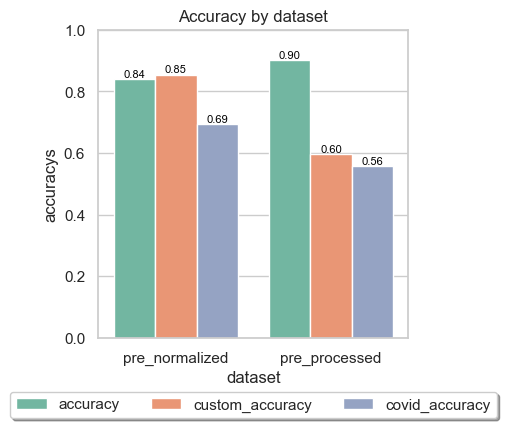

In [4]:
df_plot = df.groupby("dataset", as_index=True).mean(numeric_only = True)[["accuracy","custom_accuracy","covid_accuracy"]]
results_graphs.graph_compare_datasets_accuracy(df_plot, "Accuracy by dataset")
df_plot

In [5]:
df = df.loc[df["dataset"]=="pre_normalized"]

df.groupby("algorithm", as_index=True)\
            .mean(numeric_only = True)\
            [["accuracy","custom_accuracy","covid_accuracy","train_time"]]\
            .sort_values(by=["custom_accuracy","covid_accuracy","accuracy"], ascending=[False,False,False])

,accuracy,custom_accuracy,covid_accuracy,train_time
algorithm,,,,
Random_Forest_Classifier,0.869567,0.952400,0.727775,15.405000
Extra_Trees_Classifier,0.882992,0.940492,0.755558,45.645833
Bernoulli_NB,0.867925,0.928600,0.808325,0.988333
GradientBoost,0.846517,0.928600,0.744450,288.134167
CatBoost,0.885658,0.916683,0.738883,118.423333
SVC,0.901383,0.916683,0.702775,397.496667
LGBM,0.887150,0.910725,0.647217,2.010000
Multinomial_NB,0.866292,0.863100,0.788867,0.657500
AdaBoost,0.837225,0.827367,0.652775,65.314167


In [18]:
df.groupby("algorithm", as_index=True)\
            .mean(numeric_only = True)\
            [["accuracy","custom_accuracy","covid_accuracy"]]\
            .sort_values(by=["accuracy","custom_accuracy","covid_accuracy"], ascending=[False,False,False]).mean()

accuracy           0.839783
custom_accuracy    0.854176
covid_accuracy     0.694043
dtype: float64

In [6]:
selected_models = ["Bernoulli_NB","Random_Forest_Classifier", "SVC", "MLP"]

df_selected = df.loc[df["algorithm"].isin(selected_models)]

In [7]:
print("Setup of the models with best accuracy")
df_selected.loc[df_selected.groupby(["algorithm"])["accuracy"].idxmax()].set_index("algorithm")\
                                                      .sort_values(by=["accuracy"], ascending=[False])

Setup of the models with best accuracy


,dataset,vectorizer,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
algorithm,,,,,,,,,,
SVC,pre_normalized,TfidfVectorizer_idf_4096,0.9157,0.9233,0.9080,0.9156,0.8571,0.7667,55.18,63.95
MLP,pre_normalized,TfidfVectorizer_idf_4096,0.9144,0.9263,0.9016,0.9138,0.7143,0.7667,47.86,0.04
Bernoulli_NB,pre_normalized,CountVectorizer_4096,0.8856,0.8889,0.8832,0.8860,0.9286,0.7667,0.55,0.09
Random_Forest_Classifier,pre_normalized,TfidfVectorizer_idf_max,0.8815,0.8774,0.8887,0.8830,1.0000,0.8333,46.05,0.57


In [8]:
print("Setup of the models with best custom_accuracy")
df_selected.loc[df_selected.groupby(["algorithm"])["custom_accuracy"].idxmax()].set_index("algorithm")\
                                                      .sort_values(by=["custom_accuracy"], ascending=[False])

Setup of the models with best custom_accuracy


,dataset,vectorizer,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
algorithm,,,,,,,,,,
Random_Forest_Classifier,pre_normalized,TfidfVectorizer_idf_max,0.8815,0.8774,0.8887,0.8830,1.0000,0.8333,46.05,0.57
Bernoulli_NB,pre_normalized,CountVectorizer_4096,0.8856,0.8889,0.8832,0.8860,0.9286,0.7667,0.55,0.09
MLP,pre_normalized,TfidfVectorizer_norm_max,0.9111,0.9242,0.8970,0.9104,0.9286,0.8333,397.70,0.56
SVC,pre_normalized,TfidfVectorizer_idf_1024,0.9134,0.9253,0.9006,0.9128,0.9286,0.7000,10.54,6.43


In [9]:
print("Setup of the models with best covid_accuracy")
df_selected.loc[df_selected.groupby(["algorithm"])["covid_accuracy"].idxmax()].set_index("algorithm")\
                                                      .sort_values(by=["covid_accuracy"], ascending=[False])

Setup of the models with best covid_accuracy


,dataset,vectorizer,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
algorithm,,,,,,,,,,
Random_Forest_Classifier,pre_normalized,TfidfVectorizer_norm_4096,0.8769,0.8735,0.8832,0.8783,0.9286,0.8667,9.86,0.11
Bernoulli_NB,pre_normalized,CountVectorizer_max,0.8755,0.8956,0.8519,0.8732,0.9286,0.8333,6.28,0.99
MLP,pre_normalized,TfidfVectorizer_norm_max,0.9111,0.9242,0.8970,0.9104,0.9286,0.8333,397.70,0.56
SVC,pre_normalized,TfidfVectorizer_idf_max,0.9028,0.9102,0.8951,0.9026,0.8571,0.8000,1699.25,1169.01


,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
vectorizer,,,,,,,,
256,0.869983,0.868533,0.875258,0.871558,0.928592,0.672225,4.146667,0.371667
1024,0.880742,0.885708,0.876625,0.881033,0.880975,0.680542,8.955000,1.587500
4096,0.895008,0.898625,0.892383,0.895425,0.880967,0.786117,24.785000,15.435000
max,0.889408,0.897992,0.880408,0.889000,0.928592,0.816650,478.474167,241.387500


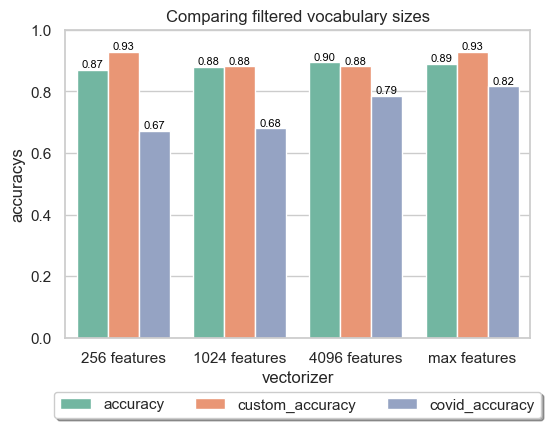

In [10]:
df_plot = df_selected.groupby(df_selected["vectorizer"].str.split('_').str[-1])\
            .mean(numeric_only=True)\
            .sort_values(by=["train_time"], ascending=[True])

df_plot_graph = df_plot[["accuracy","custom_accuracy","covid_accuracy"]]
results_graphs.graph_compare_feature_num_accuracys(df_plot_graph, title = "Comparing filtered vocabulary sizes")
df_plot

,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
vectorizer,,,,,,,,
CountVectorizer,0.883394,0.886375,0.881894,0.883962,0.915194,0.729156,109.463750,55.30250
TfidfVectorizer_norm,0.883962,0.888294,0.880869,0.884387,0.901812,0.741663,135.111250,61.08500
TfidfVectorizer_idf,0.884000,0.888475,0.880744,0.884413,0.897338,0.745831,142.695625,77.69875


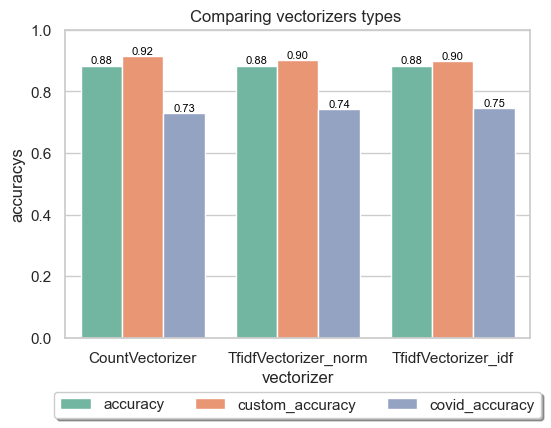

In [11]:
df_plot = pd.concat([df_selected.loc[df_selected["vectorizer"].str.startswith('CountVectorizer')].mean(numeric_only=True).to_frame().T,
           df_selected.loc[df_selected["vectorizer"].str.startswith('TfidfVectorizer_norm')].mean(numeric_only=True).to_frame().T,
           df_selected.loc[df_selected["vectorizer"].str.startswith('TfidfVectorizer_idf')].mean(numeric_only=True).to_frame().T])\
           .set_axis(['CountVectorizer', 'TfidfVectorizer_norm', 'TfidfVectorizer_idf'], axis=0)

df_plot.index.name = "vectorizer"
df_plot_graph = df_plot[["accuracy","custom_accuracy","covid_accuracy"]]

results_graphs.graph_compare_feature_num_accuracys(df_plot_graph, title = "Comparing vectorizers types ")
df_plot

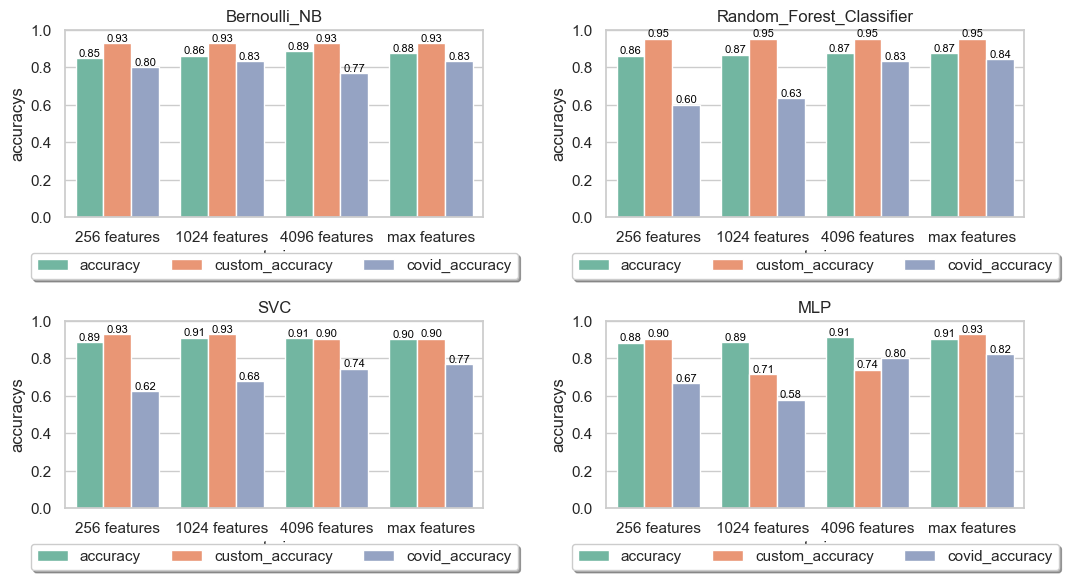

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
axes = axes.ravel()

for i, model in enumerate(selected_models):
    df_plot = df_selected.loc[df_selected["algorithm"]==model]
    df_plot = df_plot.groupby(df_selected["vectorizer"].str.split('_').str[-1])\
                     .mean(numeric_only=True)\
                     .sort_values(by=["train_time"], ascending=[True])

    df_plot = df_plot[["accuracy","custom_accuracy","covid_accuracy"]]
    results_graphs.graph_compare_feature_num_accuracys(df_plot, title = model, ax=axes[i])
plt.tight_layout()

,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
vectorizer,,,,,,,,
256,0.836033,0.838086,0.835805,0.835300,0.860548,0.661112,3.599048,0.148571
1024,0.844574,0.851081,0.837117,0.843295,0.840148,0.683321,9.039286,0.563095
4096,0.847776,0.852714,0.847121,0.848879,0.858852,0.712693,24.990952,4.770238
max,0.830748,0.835998,0.831974,0.832517,0.857155,0.719045,262.517143,72.422381


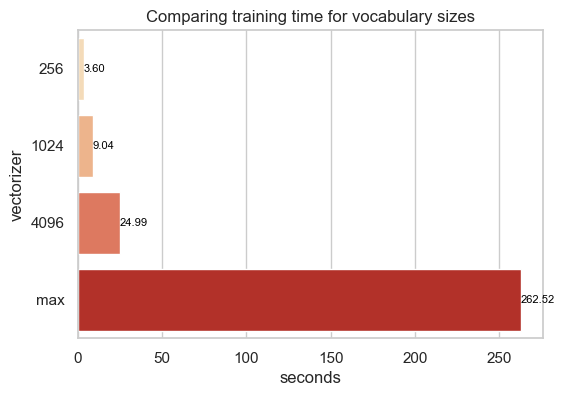

In [13]:
df_plot = df.groupby(df["vectorizer"].str.split('_').str[-1])\
            .mean(numeric_only=True)\
            .sort_values(by=["train_time"], ascending=[True])

df_plot_graph = df_plot[["train_time"]]
results_graphs.graph_compare_feature_num_train(df_plot_graph, title = "Comparing training time for vocabulary sizes")
df_plot

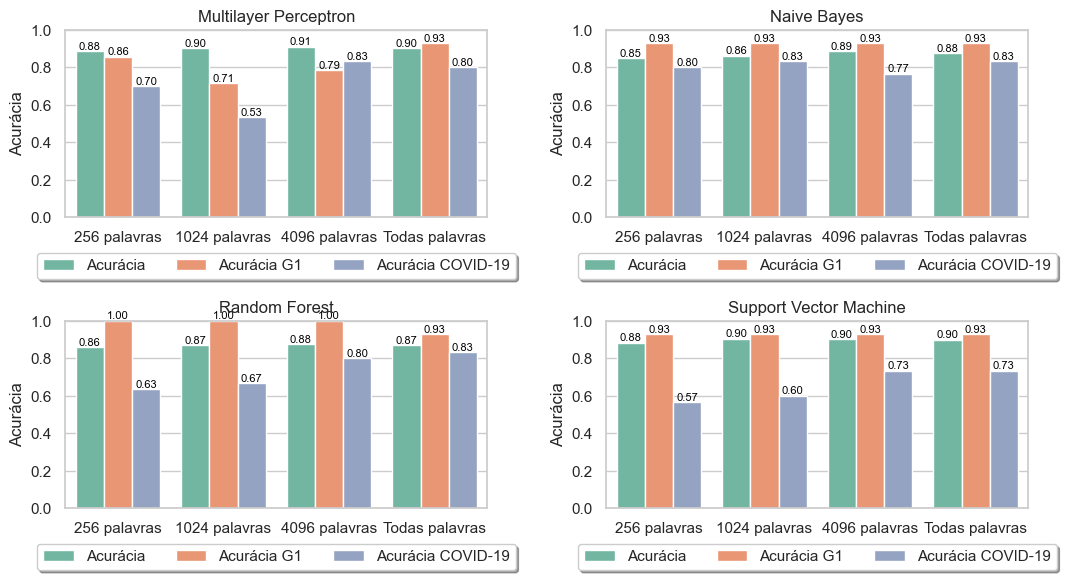

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
axes = axes.ravel()

selected_models = ['MLP', 'Bernoulli_NB', 'Random_Forest_Classifier', 'SVC']
selected_models_name = ['Multilayer Perceptron', 'Naive Bayes', 'Random Forest', 'Support Vector Machine']
for i, model in enumerate(selected_models):
    df_plot = df.loc[df["algorithm"]==model]
    df_plot = df_plot.groupby(df_plot["vectorizer"].str.split('_').str[-1])\
                     .mean(numeric_only=True)\
                     .sort_values(by=["train_time"], ascending=[True])

    df_plot = df_plot[["accuracy","custom_accuracy","covid_accuracy"]].copy().rename(columns={"accuracy":"Acurácia", "custom_accuracy":"Acurácia G1", "covid_accuracy":"Acurácia COVID-19"})
    results_graphs.graph_compare_feature_num_accuracys(df_plot, title = selected_models_name[i], ax=axes[i])
plt.tight_layout()

,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
vectorizer,,,,,,,,
256,0.84425,0.84601,0.84370,0.84454,0.86429,0.64334,2.714,0.220
1024,0.84944,0.85579,0.84120,0.84777,0.87144,0.63666,6.842,0.786
4096,0.84638,0.84230,0.86901,0.85326,0.87143,0.67332,23.892,6.530
max,0.83894,0.83869,0.86770,0.84875,0.87144,0.69333,319.579,86.317


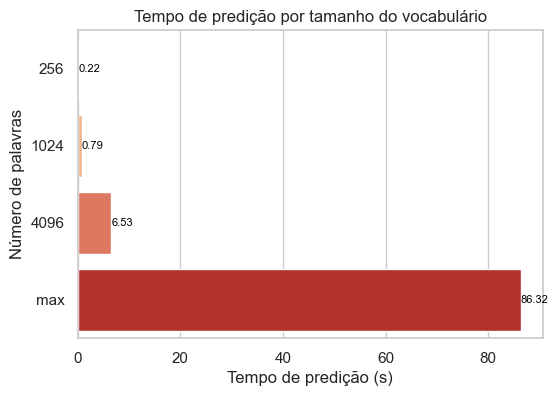

In [87]:
df_plot = df.groupby(df["vectorizer"].str.split('_').str[-1])\
            .mean(numeric_only=True)\
            .sort_values(by=["train_time"], ascending=[True])

df_plot_graph = df_plot[["predict_time"]]
results_graphs.graph_compare_feature_num_train(df_plot_graph, title = "Tempo de predição por tamanho do vocabulário")
df_plot

,accuracy,precision,recall,f1,custom_accuracy,covid_accuracy,train_time,predict_time
vectorizer,,,,,,,,
CountVectorizer,0.836166,0.837980,0.843161,0.838871,0.853321,0.672020,66.634821,16.838036
TfidfVectorizer_norm,0.842127,0.847848,0.836739,0.841445,0.848230,0.706539,77.771964,18.423036
TfidfVectorizer_idf,0.841055,0.847580,0.834113,0.839677,0.860975,0.703570,80.703036,23.167143


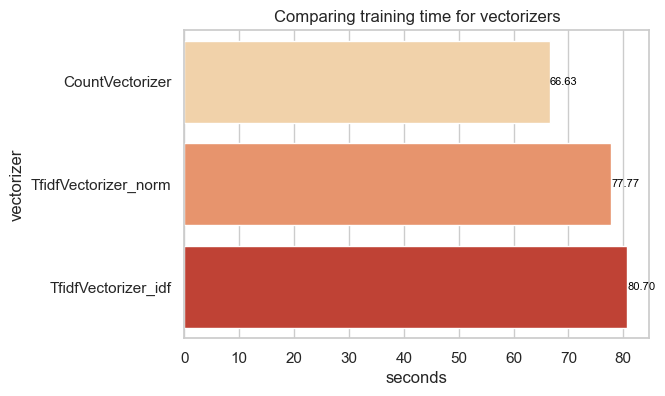

In [14]:
df_plot = pd.concat([df.loc[df["vectorizer"].str.startswith('CountVectorizer')].mean(numeric_only=True).to_frame().T,
           df.loc[df["vectorizer"].str.startswith('TfidfVectorizer_norm')].mean(numeric_only=True).to_frame().T,
           df.loc[df["vectorizer"].str.startswith('TfidfVectorizer_idf')].mean(numeric_only=True).to_frame().T])\
           .set_axis(['CountVectorizer', 'TfidfVectorizer_norm', 'TfidfVectorizer_idf'], axis=0)

df_plot.index.name = "vectorizer"
df_plot_graph = df_plot[["train_time"]]
results_graphs.graph_compare_feature_num_train(df_plot_graph, title = "Comparing training time for vectorizers")
df_plot

,accuracy,custom_accuracy,covid_accuracy
algorithm,,,
Best Random Forest,0.881500,1.000000,0.8333
Fake check,0.894583,0.714286,0.5000


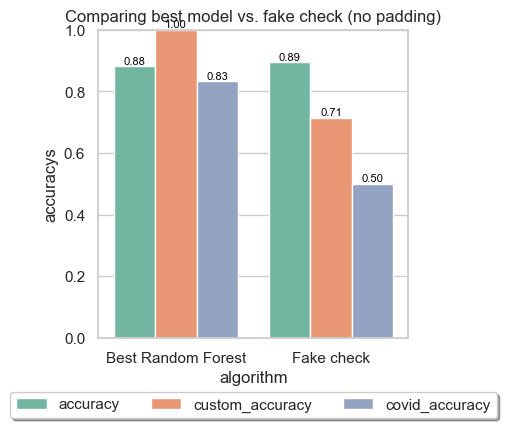

In [15]:
fake_check_results_df = pd.read_csv(os.path.join('results', 'fake_check_results.csv'), index_col=0)

best_model_df = df_selected.loc[df_selected["algorithm"] == "Random_Forest_Classifier"]\
                               .sort_values(by=["accuracy"], ascending=[False]).head(1)

best_model_df = best_model_df[["algorithm","accuracy","custom_accuracy","covid_accuracy"]]
best_model_df = best_model_df.set_index("algorithm")
best_model_df = best_model_df.rename(index={"Random_Forest_Classifier": "Best Random Forest"})

plot_df = pd.concat([best_model_df, fake_check_results_df])
results_graphs.graph_compare_face_check_accuracy(plot_df, title = "Comparing best model vs. fake check (no padding)")
plot_df